# Checkpoint Three: Cleaning Data

Now you are ready to clean your data. Before starting coding, provide the link to your dataset below.

My dataset: https://www.kaggle.com/datasets/surajjha101/top-youtube-channels-data


Import the necessary libraries and create your dataframe(s).

In [3]:
# The first step is to Import all necessary libraries and my dataset. 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

#Read the dataset
df = pd.read_csv(r"C:\Users\ganes\Desktop\LaunchCode\data-analysis-projects\Final Project\Final project Dataset Youtube subscibers.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Youtuber     1000 non-null   object
 2   subscribers  1000 non-null   object
 3   video views  1000 non-null   object
 4   video count  1000 non-null   object
 5   category     973 non-null    object
 6   started      1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


## Missing Data

Test your dataset for missing data and handle it as needed. Make notes in the form of code comments as to your thought process.

In [17]:
# I will run the following code to know if the dataset has missing values.

df.isnull()

# Only the 'category' column shows missing data. Data in rest of the column looks good.
#At this point i am not going to do any changes. Will do later if needed.

,rank,Youtuber,subscribers,video views,video count,category,started
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False


In [18]:
columns = df.columns

print(columns)

Index(['rank', 'Youtuber', 'subscribers', 'video views', 'video count',
       'category', 'started'],
      dtype='object')


In [19]:
# I will run the following code to see exactly how many values are missing.
df.isnull().sum()
# 27 values are missing in the column 'category'. 
# I will not make any changes like deleting the column or adding the values. I will do it later as needed.

rank            0
Youtuber        0
subscribers     0
video views     0
video count     0
category       27
started         0
dtype: int64

In [23]:

df['category'] = df['category'].fillna('unknown')

In [5]:
df.describe()

,rank,started
count,1000.000000,1000.000000
mean,500.500000,2012.376000
std,288.819436,3.998076
min,1.000000,1970.000000
25%,250.750000,2010.000000
50%,500.500000,2013.000000
75%,750.250000,2015.000000
max,1000.000000,2021.000000


In [10]:
for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

rank - 0%
Youtuber - 0%
subscribers - 0%
video views - 0%
video count - 0%
category - 3%
started - 0%


## Irregular Data

Detect outliers in your dataset and handle them as needed. Use code comments to make notes about your thought process.

In [7]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
df['started'] = df['started'].fillna(0)
df['started'] = df['started'].astype('int64')
Q1 = df['started'].quantile(0.25)
Q3 = df['started'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find outliers
outliers = df[(df['started'] < lower_bound) | (df['started'] > upper_bound)]

print(outliers)


    rank Youtuber subscribers    video views video count         category  \
99   100  YouTube  33,300,000  2,725,286,912         540  News & Politics   

    started  
99     1970  


<Axes: >

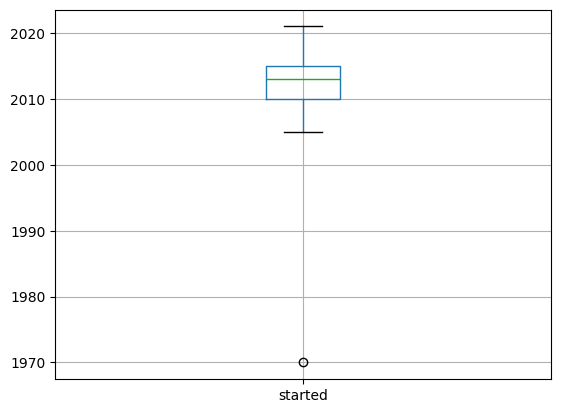

In [42]:
df.boxplot(column=['started'])
#Here channel was started in 1970. We will drop that value.


## Unnecessary Data

Look for the different types of unnecessary data in your dataset and address it as needed. Make sure to use code comments to illustrate your thought process.

In [30]:
#duplicate
# Find duplicate rows
duplicates = df.duplicated()

# Display the duplicates
print("Duplicate Rows:")
print(df[duplicates])

#There are no duplicate rows.

Duplicate Rows:
Empty DataFrame
Columns: [rank, Youtuber, subscribers, video views, video count, category, started]
Index: []


In [32]:
# Method to find duplicate columns
def find_duplicate_columns(df):
    duplicates = {}
    for col in df.columns:
        for other_col in df.columns:
            if col != other_col and df[col].equals(df[other_col]):
                duplicates[col] = other_col
    return duplicates

duplicate_columns_dict = find_duplicate_columns(df)
print("Duplicate Columns:", duplicate_columns_dict)


#There are no duplicate columns.

Duplicate Columns: {}


In [5]:
#As Youtube trends are changing so fast, I want to consider the data from last 5 years only to see whats trending now.
# For this I will choose the data from last 10 years only for my further analysis.

df_filtered = df[(df['started'] >= 2011) & (df['started'] <= 2021)]
print(df_filtered)

     rank             Youtuber  subscribers     video views video count  \
1       2       YouTube Movies  154,000,000               0           0   
4       5                Music  116,000,000               0           0   
6       7              MrBeast  102,000,000  16,832,456,681         726   
7       8  âœ¿ Kids Diana Show   99,700,000  79,602,288,245       1,009   
8       9          Like Nastya   99,200,000  81,963,845,811         702   
..    ...                  ...          ...             ...         ...   
995   996             JP Plays   10,900,000   4,609,300,218       3,528   
996   997        TrapMusicHDTV   10,900,000   4,070,521,973         690   
997   998          Games EduUu   10,900,000   3,093,784,767       1,006   
998   999                Hueva   10,900,000   3,040,301,750         831   
999  1000       Dobre Brothers   10,900,000   2,808,411,693         590   

             category  started  
1    Film & Animation     2015  
4                 NaN     2013  


## Inconsistent Data

Check for inconsistent data and address any that arises. As always, use code comments to illustrate your thought process.

In [11]:
#datatypes
print(df_filtered.dtypes)

rank            int64
Youtuber       object
subscribers    object
video views    object
video count    object
category       object
started         int64
dtype: object


In [12]:
df_filtered.started.value_counts()

started
2014    119
2013     93
2015     93
2011     93
2012     85
2016     77
2017     60
2018     46
2019     25
2020     10
2021      4
Name: count, dtype: int64

In [13]:
for col in df_filtered.columns:
    pct_missing = np.mean(df_filtered[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

rank - 0%
Youtuber - 0%
subscribers - 0%
video views - 0%
video count - 0%
category - 4%
started - 0%


In [10]:
#Deleting the rows with missing values in 'category' column, because most of them are news channels and entertainment movies channels.
df_filtered = df_filtered.dropna()
print(df_filtered)

     rank             Youtuber  subscribers     video views video count  \
1       2       YouTube Movies  154,000,000               0           0   
6       7              MrBeast  102,000,000  16,832,456,681         726   
7       8  âœ¿ Kids Diana Show   99,700,000  79,602,288,245       1,009   
8       9          Like Nastya   99,200,000  81,963,845,811         702   
11     12    Zee Music Company   86,700,000  49,067,711,243       6,603   
..    ...                  ...          ...             ...         ...   
995   996             JP Plays   10,900,000   4,609,300,218       3,528   
996   997        TrapMusicHDTV   10,900,000   4,070,521,973         690   
997   998          Games EduUu   10,900,000   3,093,784,767       1,006   
998   999                Hueva   10,900,000   3,040,301,750         831   
999  1000       Dobre Brothers   10,900,000   2,808,411,693         590   

             category  started  
1    Film & Animation     2015  
6       Entertainment     2012  


In [15]:
for col in df_filtered.columns:
    pct_missing = np.mean(df_filtered[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

rank - 0%
Youtuber - 0%
subscribers - 0%
video views - 0%
video count - 0%
category - 0%
started - 0%


In [12]:
# Download the filtered DataFrame as a CSV file
df_filtered.to_csv(r'C:\Users\ganes\Desktop\LaunchCode\data-analysis-projects\Final Project\Filtered_data.csv')

## Summarize Your Results

Make note of your answers to the following questions.

1. Did you find all four types of dirty data in your dataset? Yes.
2. Did the process of cleaning your data give you new insights into your dataset? Yes
3. Is there anything you would like to make note of when it comes to manipulating the data and making visualizations? No